In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from scipy import fftpack

In [2]:
data = pd.read_csv('Precipitation data(csv)/Preci19.csv')

In [4]:
del data['Unnamed: 0'], data['Month_name']
data

,Date,precipitationCal
0,2019-06-01 00:00:00,0.000
1,2019-06-01 00:30:00,0.000
2,2019-06-01 01:00:00,0.000
3,2019-06-01 01:30:00,0.000
4,2019-06-01 02:00:00,0.000
...,...,...
4411,2019-08-31 21:30:00,0.254
4412,2019-08-31 22:00:00,0.148
4413,2019-08-31 22:30:00,0.111
4414,2019-08-31 23:00:00,0.078


In [5]:
type(data['Date'][0])

str

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index("Date", inplace = True)
date1 = data.resample('D').sum()
date1

,precipitationCal
Date,
2019-06-01,0.047
2019-06-02,3.125
2019-06-03,0.211
2019-06-04,0.676
2019-06-05,0.030
...,...
2019-08-27,0.557
2019-08-28,0.284
2019-08-29,4.575


In [7]:
data_day19 = date1.reset_index()
data_day19

,Date,precipitationCal
0,2019-06-01,0.047
1,2019-06-02,3.125
2,2019-06-03,0.211
3,2019-06-04,0.676
4,2019-06-05,0.030
...,...,...
87,2019-08-27,0.557
88,2019-08-28,0.284
89,2019-08-29,4.575
90,2019-08-30,28.467


In [8]:
data_day19.to_csv('Daywise_19.csv')

In [9]:
data_day19['precipitationCal'].describe()

count     92.000000
mean      26.131565
std       41.754925
min        0.003000
25%        0.743000
50%        4.755500
75%       35.809000
max      232.675000
Name: precipitationCal, dtype: float64

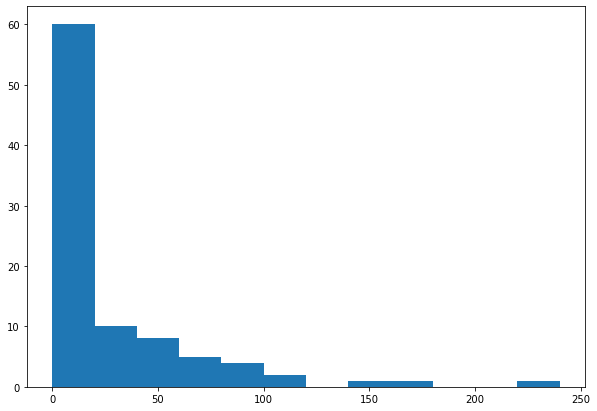

In [15]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(data_day19['precipitationCal'], bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220,240]) 
plt.show()

In [17]:
y = data_day19['precipitationCal']
y = list(y)

C:\Users\Yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


<StemContainer object of 3 artists>

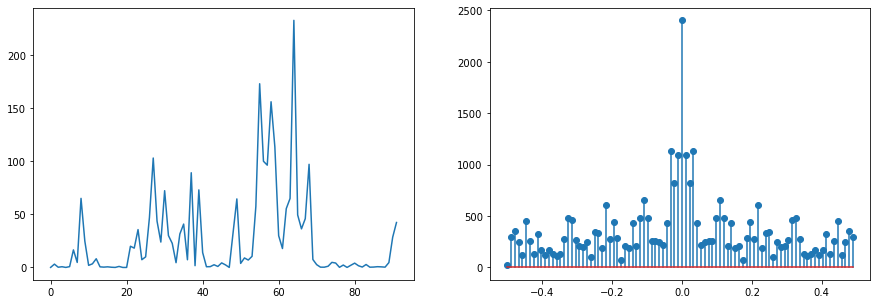

In [38]:
f_s = 1
t = np.arange(0,92,1/Fs)
Y = fftpack.fft(y)
freqs = fftpack.fftfreq(len(y)) * f_s
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(t, y)    # plot time series
ax[1].stem(freqs,np.abs(Y)) # plot freq

In [31]:
freqs

array([ 0.        ,  0.01086957,  0.02173913,  0.0326087 ,  0.04347826,
        0.05434783,  0.06521739,  0.07608696,  0.08695652,  0.09782609,
        0.10869565,  0.11956522,  0.13043478,  0.14130435,  0.15217391,
        0.16304348,  0.17391304,  0.18478261,  0.19565217,  0.20652174,
        0.2173913 ,  0.22826087,  0.23913043,  0.25      ,  0.26086957,
        0.27173913,  0.2826087 ,  0.29347826,  0.30434783,  0.31521739,
        0.32608696,  0.33695652,  0.34782609,  0.35869565,  0.36956522,
        0.38043478,  0.39130435,  0.40217391,  0.41304348,  0.42391304,
        0.43478261,  0.44565217,  0.45652174,  0.4673913 ,  0.47826087,
        0.48913043, -0.5       , -0.48913043, -0.47826087, -0.4673913 ,
       -0.45652174, -0.44565217, -0.43478261, -0.42391304, -0.41304348,
       -0.40217391, -0.39130435, -0.38043478, -0.36956522, -0.35869565,
       -0.34782609, -0.33695652, -0.32608696, -0.31521739, -0.30434783,
       -0.29347826, -0.2826087 , -0.27173913, -0.26086957, -0.25

In [35]:
np.abs(Y)

array([2404.104     , 1090.62267585,  817.20134233, 1130.58197507,
        429.70335737,  222.03759393,  243.79682215,  257.09883594,
        257.89512936,  482.80877044,  653.69974281,  482.06698556,
        208.74058196,  431.2432912 ,  192.29016197,  211.11452934,
         71.19610355,  286.74718255,  438.51531398,  272.50716   ,
        607.72928093,  190.18509486,  337.55090038,  342.27072939,
        105.87919046,  248.59316739,  197.0270772 ,  210.02169253,
        262.69184685,  462.66699947,  482.99883981,  274.39919358,
        130.74727626,  115.06662118,  130.38655045,  168.7795771 ,
        118.66155856,  165.78699905,  322.65022275,  134.46260948,
        254.29757229,  447.52328333,  120.99732762,  247.78800829,
        351.5803966 ,  300.56162986,   22.778     ,  300.56162986,
        351.5803966 ,  247.78800829,  120.99732762,  447.52328333,
        254.29757229,  134.46260948,  322.65022275,  165.78699905,
        118.66155856,  168.7795771 ,  130.38655045,  115.06662

In [39]:
df = pd.DataFrame(list(zip(freqs, np.abs(Y))),columns =['Freq', 'Amplitude']) 
df 

,Freq,Amplitude
0,0.000000,2404.104000
1,0.010870,1090.622676
2,0.021739,817.201342
3,0.032609,1130.581975
4,0.043478,429.703357
...,...,...
87,-0.054348,222.037594
88,-0.043478,429.703357
89,-0.032609,1130.581975
90,-0.021739,817.201342


In [40]:
df.to_csv('Fourier_Ampli_data.csv')

In [41]:
temp_fft = fftpack.fft(y)
temp_psd = np.abs(temp_fft) ** 2
fftfreq = fftpack.fftfreq(len(temp_psd), 1. / 92)
i = fftfreq > 0

Text(0, 0.5, 'log')

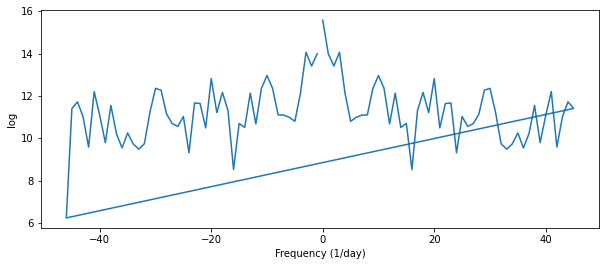

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(fftfreq, np.log(temp_psd))
ax.set_xlabel('Frequency (1/day)')
ax.set_ylabel('log')

In [43]:
dt = 1/92
freq_vector = np.fft.rfftfreq(92, d=dt)

In [49]:
quefrency = np.fft.rfftfreq(np.log(temp_psd).size,freq_vector[1] - freq_vector[0])

In [50]:
cep = np.fft.rfft(np.log(temp_psd))

C:\Users\Yash\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


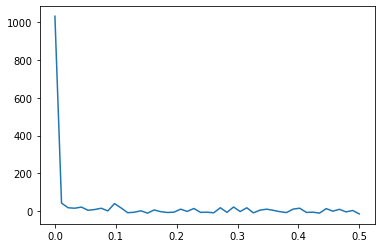

In [51]:
plt.plot(quefrency,cep)

In [52]:
df_cep = pd.DataFrame(list(zip(quefrency, cep)),columns =['quefrency', 'Ampli']) 
df_cep.to_csv('CepstrumData19.csv') 